In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [5]:
x_train.shape


(50000, 32, 32, 3)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
#Converting y_train into 1D array also known as flatening
y_train = y_train.reshape(-1,)

In [8]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

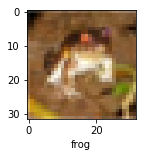

In [9]:
#Creating a function to display a image from the samples and its label
image = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_myimage(X, y, index):
    #image size
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(image[y[index]])
    

    
plot_myimage(x_train, y_train, 0)

In [10]:
#Here we are performing a normalization of data to set the numeric value between 0 and 1
x_train = x_train/255.0
x_test = x_test/255.0

#Training using artificial neural network

NN = models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                        layers.Dense(3000, activation='relu'),
                        layers.Dense(3000, activation='relu'),
                        layers.Dense(100, activation='softmax')])
NN.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NN.fit(x_train, y_train, epochs=5)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
50000/50000 [==============================] - 192s 4ms/sample - loss: 1.8743 - acc: 0.3342
Epoch 2/5
50000/50000 [==============================] - 190s 4ms/sample - loss: 1.6492 - acc: 0.4184
Epoch 3/5
50000/50000 [==============================] - 212s 4ms/sample - loss: 1.5627 - acc: 0.4472
Epoch 4/5
50000/50000 [==============================] - 196s 4ms/sample - loss: 1.4968 - acc: 0.4718
Epoch 5/5
50000/50000 [==============================] - 189s 4ms/sample - loss: 1.4476 - acc: 0.4893


In [11]:
#making function for classification report
import sklearn 
from sklearn.metrics import confusion_matrix, classification_report

y_pred=NN.predict(x_test)
print (y_pred)
y_pred_class = [np.argmax(i) for i in y_pred]

def print_report():    
    print ("Classification \n", classification_report(y_test, y_pred_class))

print_report()

[[3.5053760e-02 1.7333658e-02 1.4056817e-01 ... 1.6091491e-05
  1.3493499e-05 1.6577435e-05]
 [5.3335249e-02 3.2210749e-02 2.3346208e-03 ... 5.0943947e-07
  2.5141568e-07 4.1812297e-07]
 [2.7222756e-01 2.2604156e-02 5.0915405e-03 ... 2.3677703e-06
  1.0860424e-06 2.0402465e-06]
 ...
 [3.0477562e-03 1.8042125e-03 1.6578332e-01 ... 7.1022419e-06
  9.3868584e-06 6.7442284e-06]
 [6.8917237e-02 1.8394753e-02 1.3260527e-01 ... 4.7882104e-06
  4.0718714e-06 4.6728069e-06]
 [7.6337613e-02 1.4516846e-02 1.1252664e-01 ... 1.0231874e-04
  9.4985378e-05 7.3527292e-05]]
Classification 
               precision    recall  f1-score   support

           0       0.46      0.60      0.52      1000
           1       0.71      0.29      0.42      1000
           2       0.42      0.24      0.31      1000
           3       0.39      0.25      0.31      1000
           4       0.32      0.60      0.42      1000
           5       0.45      0.34      0.39      1000
           6       0.56      0.46      0

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 43s 869us/sample - loss: 1.4875 - acc: 0.4640
Epoch 2/10
50000/50000 [==============================] - 44s 874us/sample - loss: 1.1375 - acc: 0.5994
Epoch 3/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.0052 - acc: 0.6480
Epoch 4/10
50000/50000 [==============================] - 44s 879us/sample - loss: 0.9215 - acc: 0.6797
Epoch 5/10
50000/50000 [==============================] - 44s 879us/sample - loss: 0.8534 - acc: 0.7022
Epoch 6/10
50000/50000 [==============================] - 43s 869us/sample - loss: 0.8046 - acc: 0.7201
Epoch 7/10
50000/50000 [==============================] - 43s 867us/sample - loss: 0.7509 - acc: 0.7373
Epoch 8/10
50000/50000 [==============================] - 44s 875us/sample - loss: 0.7015 - acc: 0.7535
Epoch 9/10
50000/50000 [==============================] - 44s 873us/sample - loss: 0.6623 - acc: 0.7684
Epoch 10/10
50000/50000 [==============================] - 44s 872

In [13]:
y_pred1=cnn.predict(x_test)
print (y_pred1)
y_pred_class1 = [np.argmax(i) for i in y_pred1]

def print_report():    
    print ("Classification \n", classification_report(y_test, y_pred_class1))

print_report()

[[3.0797811e-03 3.4254495e-04 1.0670285e-02 ... 4.3009430e-05
  2.1921299e-02 1.6063743e-03]
 [9.3563009e-05 1.2597144e-02 1.4056384e-07 ... 5.7214343e-08
  9.8721075e-01 9.5928597e-05]
 [1.4833786e-01 2.0099995e-01 6.1013486e-04 ... 2.4403207e-02
  5.2672762e-01 7.1137503e-02]
 ...
 [6.0993788e-04 8.9177565e-06 6.9261879e-02 ... 2.8408617e-01
  2.4551549e-04 5.5908284e-04]
 [4.7247522e-02 3.2697327e-02 5.7853414e-03 ... 1.0674747e-03
  4.3348798e-05 9.2250668e-03]
 [1.2665899e-05 1.2279530e-06 1.5826027e-04 ... 9.9783057e-01
  5.0734280e-07 5.0245313e-07]]
Classification 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.86      0.74      0.80      1000
           2       0.65      0.54      0.59      1000
           3       0.57      0.47      0.51      1000
           4       0.59      0.72      0.65      1000
           5       0.65      0.53      0.59      1000
           6       0.72      0.81      0